In [87]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [88]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [89]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [90]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [91]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [92]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [93]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [94]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [95]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [96]:
# Find the most recent date in the data set.
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column['name'])

last_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date_string = last_date_str[0]
print(last_date_string)

id
station
date
prcp
tobs
2017-08-23


In [97]:
import datetime as dt

2017-08-23


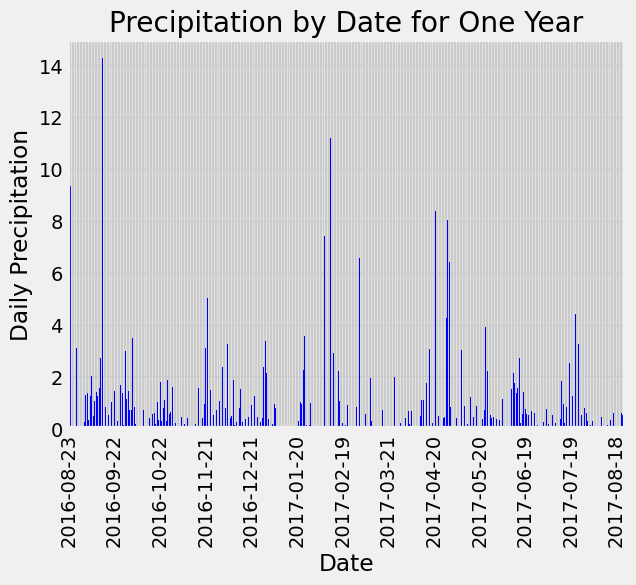

In [109]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
print(dt.date(y, m ,d))
year_before = dt.date(y, m ,d)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

one_year = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date>= year_before).\
        order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_df = pd.DataFrame(one_year, columns = ['id', 'Station', 'Date', "Precipitation", 'Obs Temp'])

# Sort the dataframe by date

precip_by_date = one_year_df.groupby('Date')['Precipitation'].sum().reset_index()
precip_by_date.head()
# Use Pandas Plotting with Matplotlib to plot the data
Precip = precip_by_date.plot.bar(x='Date', y='Precipitation', color = 'blue', rot = 90, legend = None, xlabel = 'Date', ylabel = 'Daily Precipitation')
for index, label in enumerate(Precip.xaxis.get_ticklabels()):
    if index % 30 != 0:
        label.set_visible(False)
plt.title('Precipitation by Date for One Year')
plt.show()

In [112]:
# Use Pandas to calculate the summary statistics for the precipitation data
one_year_df['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [116]:
# Design a query to calculate the total number of stations in the dataset
columns = inspector.get_columns('Station')
for column in columns:
    print(column['name'])

query1 = session.query(Station.station).count()
print(query1)

id
station
name
latitude
longitude
elevation
9


In [119]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Station.station, func.count(Station.station)]
activity = session.query(*sel).group_by(Station.station).all()
activity

#query = select([your_table.c.column_name, func.count()]).where(your_table.c.column_name == specific_value).group_by(your_table.c.column_name)


[('USC00511918', 1),
 ('USC00513117', 1),
 ('USC00514830', 1),
 ('USC00516128', 1),
 ('USC00517948', 1),
 ('USC00518838', 1),
 ('USC00519281', 1),
 ('USC00519397', 1),
 ('USC00519523', 1)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

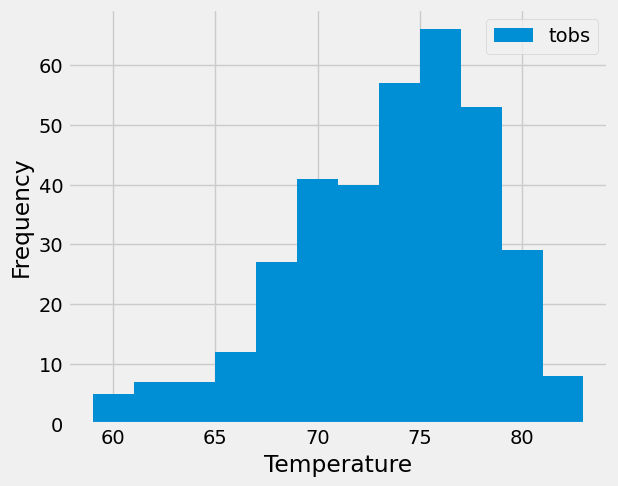

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [86]:
# Close Session
session.close()